In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

Task 2: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/lucianbluescher/Visualizing_Oil_Spills_NYC


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

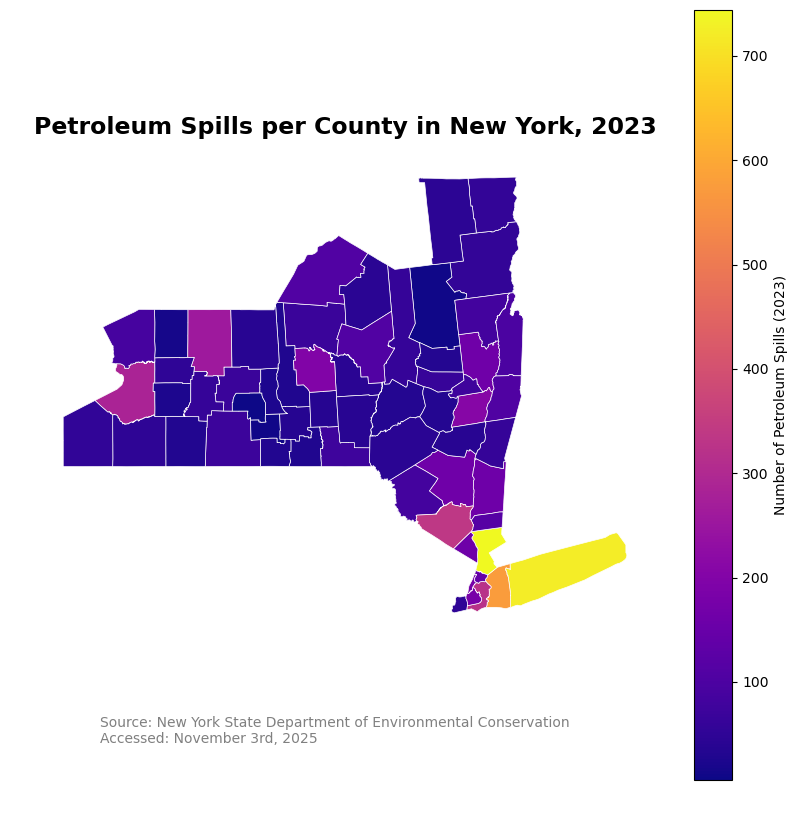

In [2]:
## 1. Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 2. Read data
# Set 'PROF_LIB' environment variable
os.environ['PROJ_LIB'] = '/opt/anaconda3/envs/eds220-env/share/proj'

# Downloaded Spill incidents data
spills = pd.read_csv("data/Spill_Incidents_20251105.csv")

# From URL that brings to zipped file
counties = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2023/COUNTY/tl_2023_us_county.zip")

## 3. Clean data
# Simplify columns to lower_case and change date columns to datetime
spills = spills.rename(columns=lambda c: c.lower().replace(' ', '_'))
spills[["spill_date", "received_date", "close_date"]] = spills[
    ["spill_date", "received_date", "close_date"]
].apply(pd.to_datetime)

# Simplify column names and select only NY counties
ny_counties = (
    counties
    .rename(columns=str.lower)
    .loc[lambda c: c['statefp'] == '36']
)

# Select Petroleum spills between Jan 1st and Oct 31st and count them.
spills_per_county = (
    spills[
        (spills['spill_date'].between('2023-01-01', '2023-10-31')) &
        (spills['material_family'] == 'Petroleum')
    ]
    .groupby('county')
    .size()
    .reset_index(name='n_spills')
)

# Add 1 to Niagara county to represent Tuscarora
spills_per_county.loc[
    spills_per_county['county'].str.contains('Niagara'), 'n_spills'
] += 1

## 4. Merge Dataframes.
# Merge and convert to GeoDataFrame
ny_spills_gdf = gpd.GeoDataFrame(
    ny_counties.rename(columns={'name': 'county'})
    .merge(spills_per_county, on='county', how='inner'),
    geometry='geometry',
    crs="EPSG:4326"
)

## 5. Plot
# Create the map
fig, ax = plt.subplots(figsize=(10, 10))

ny_spills_gdf.plot(
    column='n_spills',
    cmap='plasma',              # Color-blind friendly color mapping
    linewidth=0.5,               
    edgecolor='white',           
    legend=True,                 # Add legend
    legend_kwds={
        'label': "Number of Petroleum Spills (2023)", # Add label and format
        'orientation': "vertical"
    },
    ax=ax
)
# Add title
ax.set_title(
    "Petroleum Spills per County in New York, 2023",
    fontdict={'fontsize': 17, 'fontweight': 'bold'},
    pad=15
)
# Remove axes
ax.set_axis_off()

# Add annotation
plt.annotate(
    "Source: New York State Department of Environmental Conservation\nAccessed: November 3rd, 2025",
    xy=(0.1, 0.08), xycoords='figure fraction',
    fontsize=10, color='gray'
)

# deploy map
plt.show()

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

## Oil Spills Data
#### Accessed: 11/3/2025
#### Data Updated by DEC: 11/3/2025
The New York Department of Environmental Conservation (DEC) keeps track of petroleum and hazardous material spills in New York State. The data includes location, date, what caused it, what kind of material got out, how much was released and cleaned up, and whether it reached any water. Spill data are added usually within 72 hours of a spill and are published "as is" so may contain inaccuracies. 

## TIGER shapefile
#### Accessed: 11/3/2025
#### Released: 11/22/2023
The 2023 TIGER/Line Shapefile from the U.S. Census Bureau contains boundaries for every U.S. county and county equivilent areas. It is made by the Census Bureau’s MAF/TIGER system on January 1, 2023.

## 3. Import libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [4]:
# Set 'PROF_LIB' environment variable
os.environ['PROJ_LIB'] = '/opt/anaconda3/envs/eds220-env/share/proj'

# Downloaded Spill incidents data
fp = "data/Spill_Incidents_20251105.csv"
spills = pd.read_csv(fp)

# From URL that brings to zipped file
url = "https://www2.census.gov/geo/tiger/TIGER2023/COUNTY/tl_2023_us_county.zip"
counties = gpd.read_file(url)

# Given csv
q5d = pd.read_csv('data/q5d_df.csv')



<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [5]:
#a. Check the dataframe's head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6


In [6]:
#b. Check the data types of the columns
spills.dtypes

Spill Number              int64
Program Facility Name    object
Street 1                 object
Street 2                 object
Locality                 object
County                   object
ZIP Code                 object
SWIS Code                 int64
DEC Region                int64
Spill Date               object
Received Date            object
Contributing Factor      object
Waterbody                object
Source                   object
Close Date               object
Material Name            object
Material Family          object
Quantity                 object
Units                    object
Recovered                object
dtype: object

In [7]:
#c. Check the unique values in the `material_family` column
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [8]:
#d. Check the unique values in the `county` column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Oneida', 'Wayne', 'Suffolk',
       'Orleans', 'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison',
       'Chemung', 'Seneca', 'Broome', 'Hamilton', 'Washington', 'Steuben',
       'Rensselaer', 'Franklin', 'Columbia', 'Fulton', 'Herkimer',
       'Schoharie', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Tioga', 'Chautauqua', 'Cattaraugus',
       'Wyoming', 'Yates', 'Greene', 'Pennsylvania - Region 9',
       'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

#e. I learned all the names of countys in New York State. I also learned that there are only two recorded material familys but many more materials. We have mostly objects but many of the numerical observations are integers or float. The dates are objects which we may need to convert to datetime objects later.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [9]:
# Simplify columns to lower_case and replace spaces with underscores
spills.columns = (spills.columns
                    .str.lower()
                    .str.replace(' ', '_'))
spills.columns

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [10]:
# Update date columns to pd datetimes
spills['spill_date'] = pd.to_datetime(spills['spill_date'])
spills['received_date'] = pd.to_datetime(spills['received_date'])
spills['close_date'] = pd.to_datetime(spills['close_date'])
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                         object
units                            object
recovered                        object
dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [11]:
# Select only spills between Jan 1st 2023 and Oct 31st 2023.
petr_23 = spills[(spills['spill_date'] >= '2023-01-01') & (spills['spill_date'] <= '2023-10-31')]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [12]:
# Check the year and months our dataframe contains
print(f"The dataset only has data from years: {petr_23.spill_date.dt.year.unique()} "
      f"and months: {petr_23.spill_date.dt.month.unique()}.")

The dataset only has data from years: [2023] and months: [ 5  6  8  9  7  1  2  3 10  4].


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [13]:
# Filter only petroleum spills
petr_23 = petr_23[petr_23['material_family'] == "Petroleum"]

# Assert statement to confirm filter worked
assert (petr_23['material_family'] == "Petroleum").all(), "Not all rows are petroleum spills"

print("All rows are petroleum spills.")

All rows are petroleum spills.


<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [14]:
# Group by county and get n of spills, then reset index to match given CSV
spills_per_county = petr_23.groupby('county').size().reset_index(name='n_spills')
spills_per_county

,county,n_spills
0,Albany,206
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,744
62,Wyoming,24


In [15]:
grader.check("q5d")

q5d results: All test cases passed!

In [16]:
spills_per_county1 = spills_per_county.copy()

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

The preliminary data exploration gave an initial view of the data frame which is all objects except for the area of land and water which are integers. The CRS is the classic EPSG 4269 and we can see from the plot that the aleutian islands expand the plot greatly because on this CRS they fall on the far side of the world. 

In [17]:
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [18]:
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [19]:
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

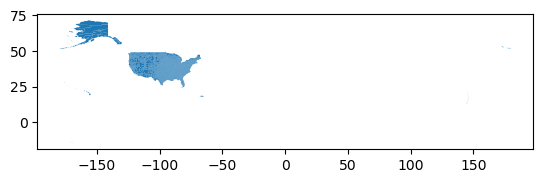

In [20]:
counties.plot()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [21]:
counties.columns = (counties.columns
                    .str.lower())

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

In [22]:
ny_counties = counties[counties['statefp'] == '36']
ny_counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,0500000US36075,Oswego,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,0500000US36111,Ulster,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."


<Axes: >

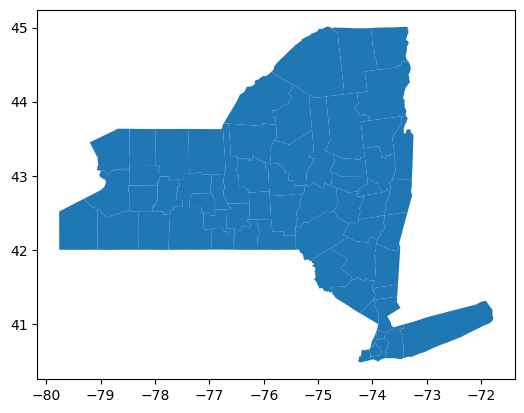

In [23]:
ny_counties.plot()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [24]:
ny_counties.name.unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [25]:
spills_per_county1.county.unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [26]:
diff_names_spills = list(np.setdiff1d(spills_per_county1.county.unique(), ny_counties.name.unique()))
diff_names_spills


['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [27]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [28]:
diff_names_ny = list(np.setdiff1d(ny_counties.name.unique(), spills_per_county1.county.unique()))
diff_names_ny

['St. Lawrence']

In [29]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [30]:
print(f"The number of spills in Tuscarora Indian Reservation is {spills_per_county1[spills_per_county1['county'].str.contains('Tuscarora Indian Reservation')]['n_spills'].values[0]}")


The number of spills in Tuscarora Indian Reservation is 1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [31]:
spills_per_county1['county'] = spills_per_county1['county'].replace('St Lawrence', 'St. Lawrence')
spills_per_county1.county.unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St. Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [32]:
ny_counties = ny_counties.rename(columns={'name': 'county'})

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [33]:
ny_counties = pd.merge(spills_per_county1, ny_counties, on='county', how='inner')


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [34]:
spills_per_county1.loc[
    spills_per_county1['county'].str.contains('Niagara'), 'n_spills'
] += 1


In [35]:
# Verify by checking n_spills went from 88 to 89
spills_per_county1[spills_per_county1['county'].str.contains('Niagara')]

,county,n_spills
32,Niagara,89


## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



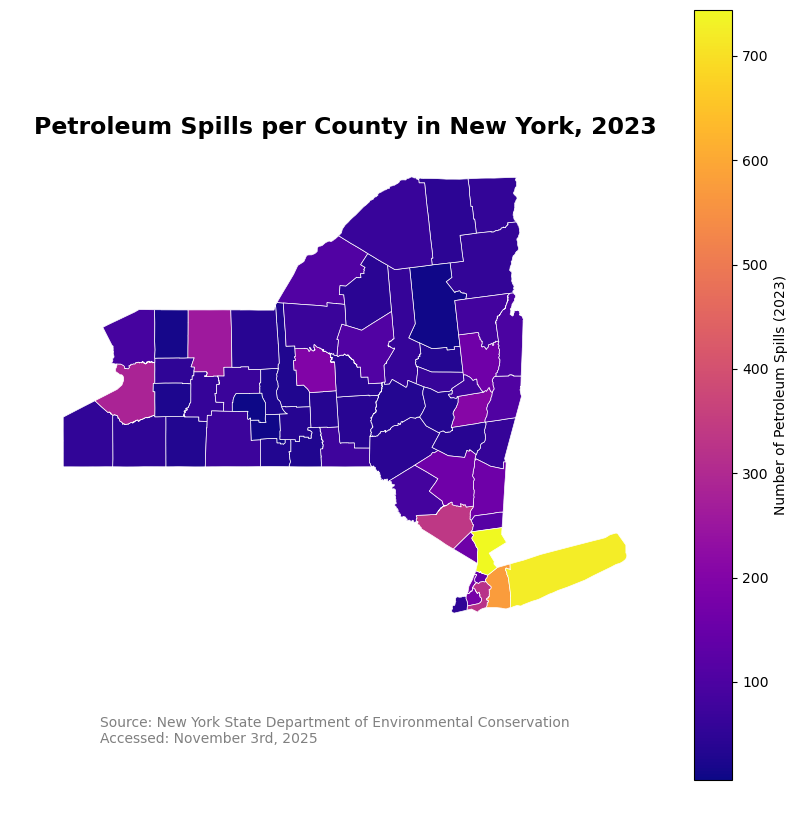

In [36]:
# Convert ny_counties to geodataframe for plotting
ny_spills_gdf = gpd.GeoDataFrame(
   ny_counties, 
    geometry='geometry',     # Confirm geometry column is geometry dtype
    crs="EPSG:4326"          # Add crs
    )

# Create the map
fig, ax = plt.subplots(figsize=(10, 10))

ny_spills_gdf.plot(
    column='n_spills',
    cmap='plasma',              
    linewidth=0.5,               
    edgecolor='white',           
    legend=True,                 # Add legend
    legend_kwds={
        'label': "Number of Petroleum Spills (2023)", # Add label and format
        'orientation': "vertical"
    },
    ax=ax
)

# Add title
ax.set_title(
    "Petroleum Spills per County in New York, 2023",
    fontdict={'fontsize': 17, 'fontweight': 'bold'},
    pad=15
)

# Remove axes
ax.set_axis_off()

# Add annotation
plt.annotate(
    "Source: New York State Department of Environmental Conservation\nAccessed: November 3rd, 2025",
    xy=(0.1, 0.08), xycoords='figure fraction',
    fontsize=10, color='gray'
)

# Show map
plt.show()

b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

This map was created with data from the Census TIGER dataset, merged with the NYSDEC spills cleaned to counts of petroleum spills in New York counties from January to October 2023. Niagara County was adjusted by adding one spill to represent Tuscarora Indian Reservation which had a spill, but was not represented on the county map. Lighter colored counties indicate higher counts.

## Complete workflow

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the choropleth map of the number of petroleum spills per county in the state of New York in 2023. The only ouput of this cell should be the choropleth map  you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [37]:
grader.check_all()

7Ac results: All test cases passed!

7Ad results: All test cases passed!

q5d results: All test cases passed!